<a href="https://colab.research.google.com/github/team-epoch/EPOCH_4th_TASK/blob/main/4th_TASK/DevelopTeam/Pilot/week4/4%EA%B8%B0_%EC%9D%B4%EC%A7%80%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Pilot Project Week1
> **주제: 신용카드 소비 패턴으로 고객 군집화**

* 데이터 소스 : Kaggle – “Credit Card Dataset for Clustering”

## 1️⃣ 데이터 출처 설명 / 데이터 불러오기

* 출처 : Kaggle - [Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.read_csv('/content/drive/MyDrive/EPOCH/EPOCH 4th/Build-Up/CC GENERAL.csv')
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


### ❔ 컬럼 정보
* `CUST_ID` : 신용카드 소지자를 식별하는 고유 ID (범주형 변수)
* `BALANCE` : 구매를 하기 위해 계정에 남아 있는 잔액
* `BALANCE_FREQUENCY` : 잔액이 얼마나 자주 갱신되는지 나타내는 값 (0~1 사이 점수, 1 = 매우 자주 갱신, 0 = 거의 갱신 안 됨)
* `PURCHASES` : 총 구매 금액
* `ONEOFF_PURCHASES` : 한 번에 이루어진 최대 단일 구매 금액
* `INSTALLMENTS_PURCHASES` : 할부로 결제된 구매 금액
* `CASH_ADVANCE` : 고객이 신용카드로 선불 현금을 받은 금액
* `PURCHASES_FREQUENCY` : 구매가 얼마나 자주 발생하는지 (0~1, 1 = 자주 구매, 0 = 거의 구매 없음)
* `ONEOFFPURCHASESFREQUENCY` : 한 번에 큰 금액 구매가 얼마나 자주 일어나는지 (0~1)
* `PURCHASESINSTALLMENTSFREQUENCY` : 할부 구매가 얼마나 자주 일어나는지 (0~1)
* `CASHADVANCEFREQUENCY` : 현금서비스가 얼마나 자주 이용되는지 (0~1)
* `CASHADVANCETRX` : 현금서비스 거래 횟수
* `PURCHASES_TRX` : 구매 거래 횟수
* `CREDIT_LIMIT` : 고객의 신용카드 한도액
* `PAYMENTS` : 고객이 실제로 납부한 결제 금액
* `MINIMUM_PAYMENTS` : 고객이 납부한 최소 결제 금액
* `PRCFULLPAYMENT` : 고객이 전액 결제를 한 비율
* `TENURE` : 고객이 해당 신용카드를 사용한 기간 (개월 단위)


## 2️⃣ 기초 통계 확인

### 기초 통계 확인


In [53]:
round(data.describe(), 2) # 소수점 둘째자리까지 통계 정보 확인

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8949.00,8950.00,8637.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.06,2372.45,0.29,1.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
25%,128.28,0.89,39.64,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,169.12,0.00,12.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
75%,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,825.49,0.14,12.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00


*데이터 간 스케일 차이가 크니, 모델링 시 스케일링도 고려해보자*

### 데이터 shape 확인

In [54]:
data.shape

(8950, 18)

*8950 행, 18 열*

### data.info()

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

*`CUST_ID` 제외 모두 숫자형 데이터*

### 결측치 확인

In [56]:
data.isnull().sum() / len(data) * 100

,0
CUST_ID,0.000000
BALANCE,0.000000
BALANCE_FREQUENCY,0.000000
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


*결측치는 아주 적다*

## 3️⃣ 분석 목적/인사이트 설명

> **금융 데이터를 기반으로 소비자를 군집화한 뒤, 소비자 행동/리스크를 설명**

>**도출해낼 수 있는 인사이트**

* 고객군 정의

* 맞춤형 상품/마케팅 전략 수립

* 신용 리스크 관리

* 고객 유지/이탈 방지

* 사회적 소비 트렌드 변화 파악

*인사이트는 추후.. 구체화 예정*

## 4️⃣ EDA

### 상관관계 plot

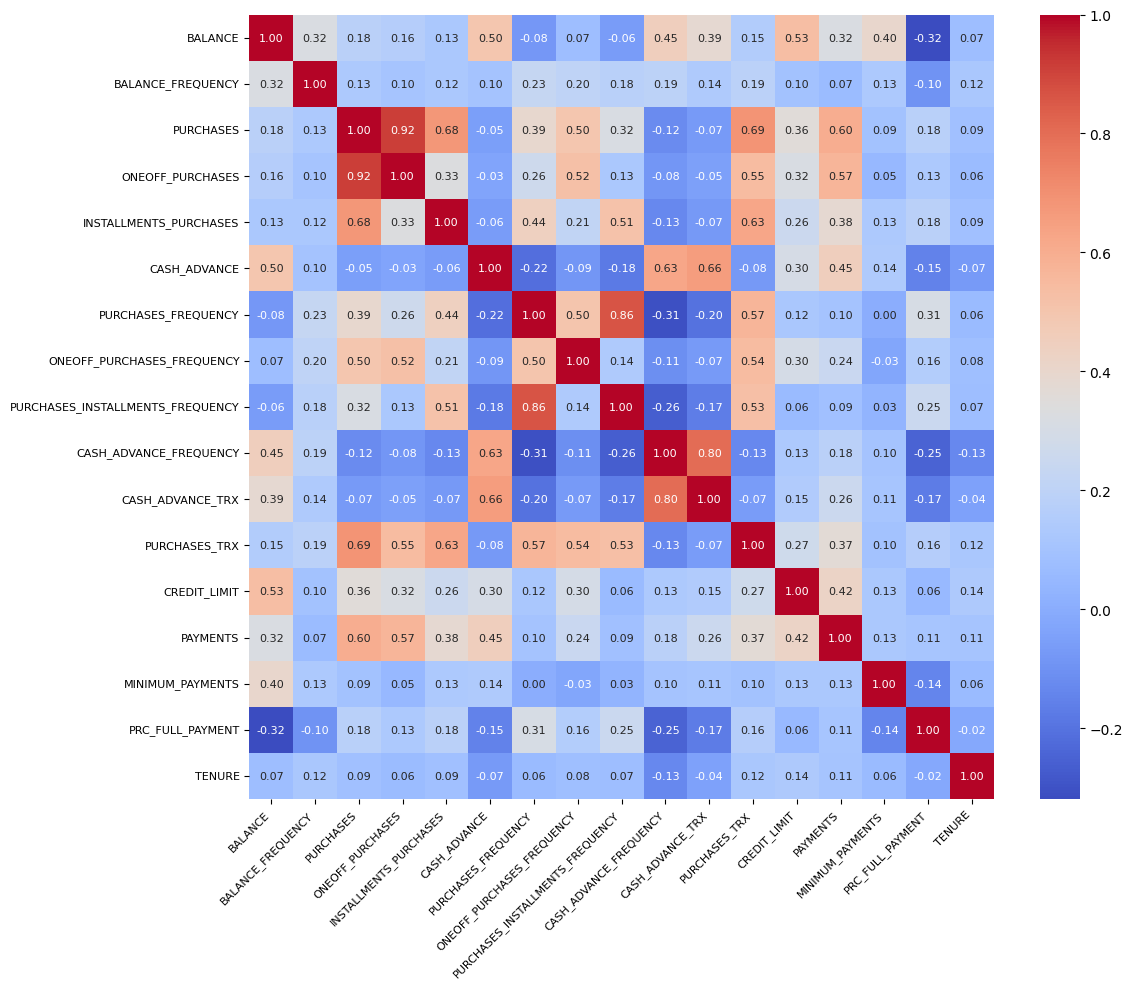

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # 전체 크기 줄이거나 키우기
corr = data.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,      # 숫자 표시
    fmt=".2f",       # 소수점 자리수
    cmap="coolwarm", # 색상맵
    annot_kws={"size": 8}  # 숫자 글자 크기 조정
)

# x, y축 라벨 각도 조정
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

1️⃣
> `PURCHASES` : 총 구매 금액
>
> `ONEOFF_PURCHASES` : 한 번에 이루어진 최대 단일 구매 금액
>
> ✅ 0.92


<br>

2️⃣
> `PURCHASES_FREQUENCY` : 구매가 얼마나 자주 발생하는지 (0~1, 1 = 자주 구매, 0 = 거의 구매 없음)
>
> `PURCHASESINSTALLMENTSFREQUENCY` : 할부 구매가 얼마나 자주 일어나는지 (0~1)
>
> ✅ 0.86


🤔 흠 .. 할부 구매 ∈ 구매?


<br>

3️⃣
> `CASHADVANCEFREQUENCY` : 현금서비스가 얼마나 자주 이용되는지 (0~1)
>
> `CASHADVANCETRX` : 현금서비스 거래 횟수
>
> ✅ 0.80

🤔 상관관계도 높고, 비슷한 내용을 담고 있는 컬럼같은데 하나만 택일해도 되지 않을까?

<br>

4️⃣
> `PURCHASES_TRX` : 구매 거래 횟수
>
> `PURCHASES` : 총 구매 금액
>
>✅ 0.69

<br>

5️⃣
> `CASH_ADVANCE` : 고객이 신용카드로 선불 현금을 받은 금액
>
> `CASHADVANCETRX` : 현금서비스 거래 횟수
>
>✅ 0.66

<br>

6️⃣
> `CASH_ADVANCE` : 고객이 신용카드로 선불 현금을 받은 금액
>
> `CASHADVANCEFREQUENCY` : 현금서비스가 얼마나 자주 이용되는지 (0~1)
>
>✅ 0.63

<br>

7️⃣
> `PURCHASES` : 총 구매 금액
>
> `PAYMENTS` : 고객이 실제로 납부한 결제 금액
>
> ✅ 0.60

### 데이터 분포 확인(히스토그램)

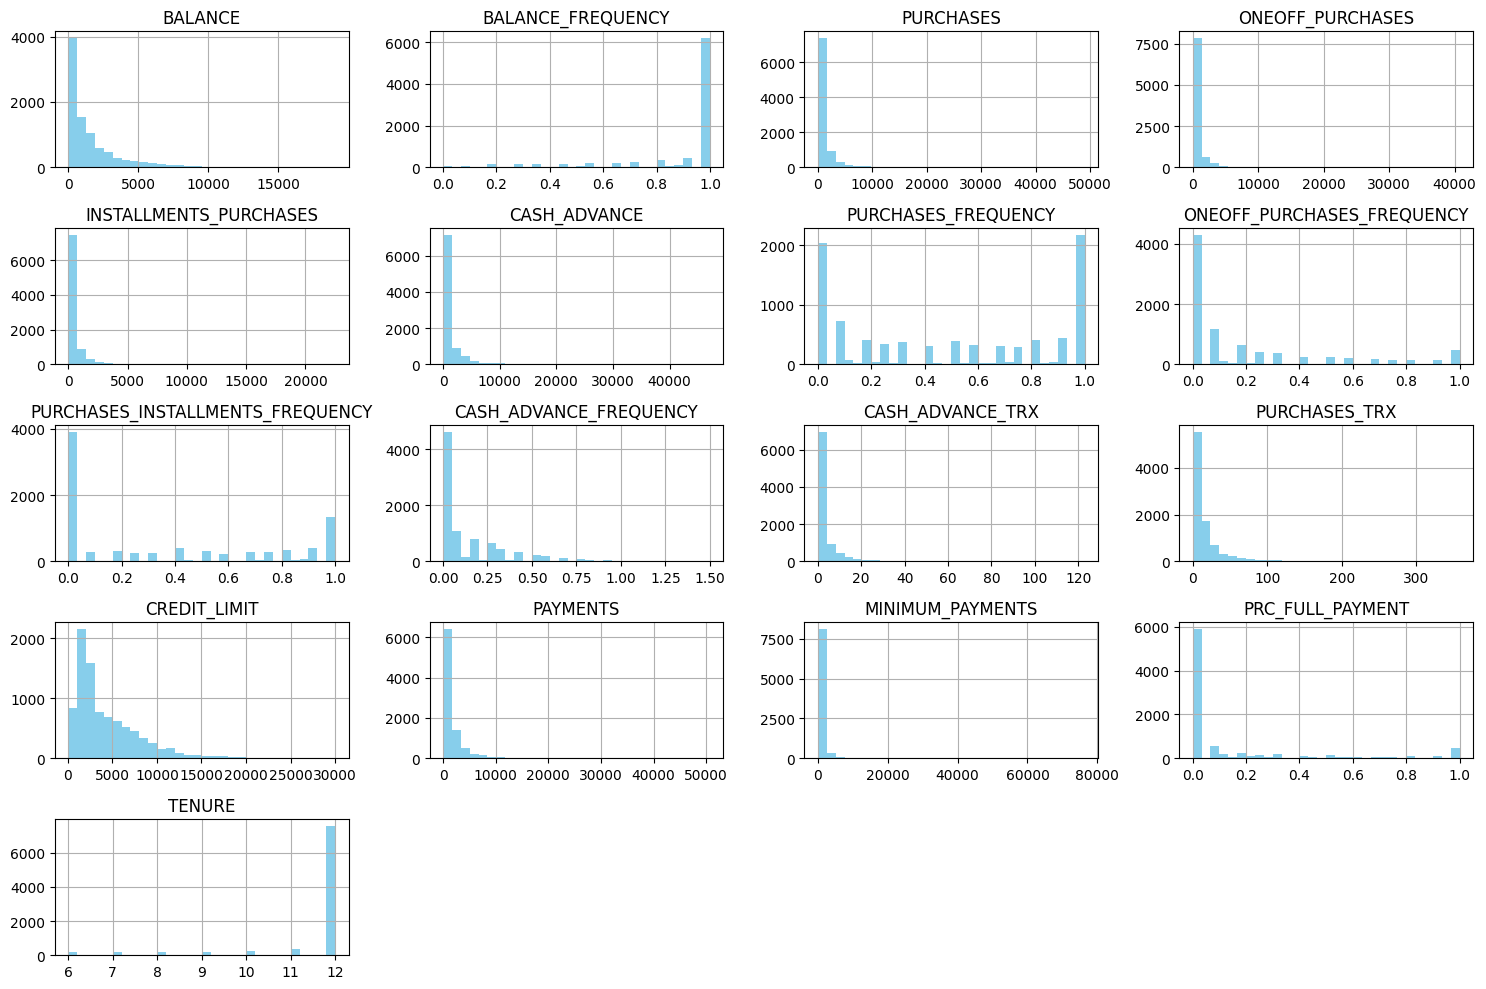

In [58]:
data.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.title('Credit Card Dataset Histogram')
plt.tight_layout()
plt.show()

*거의 모든 변수가 한 쪽으로 치우친 분포를 보임*

### Boxplot 확인

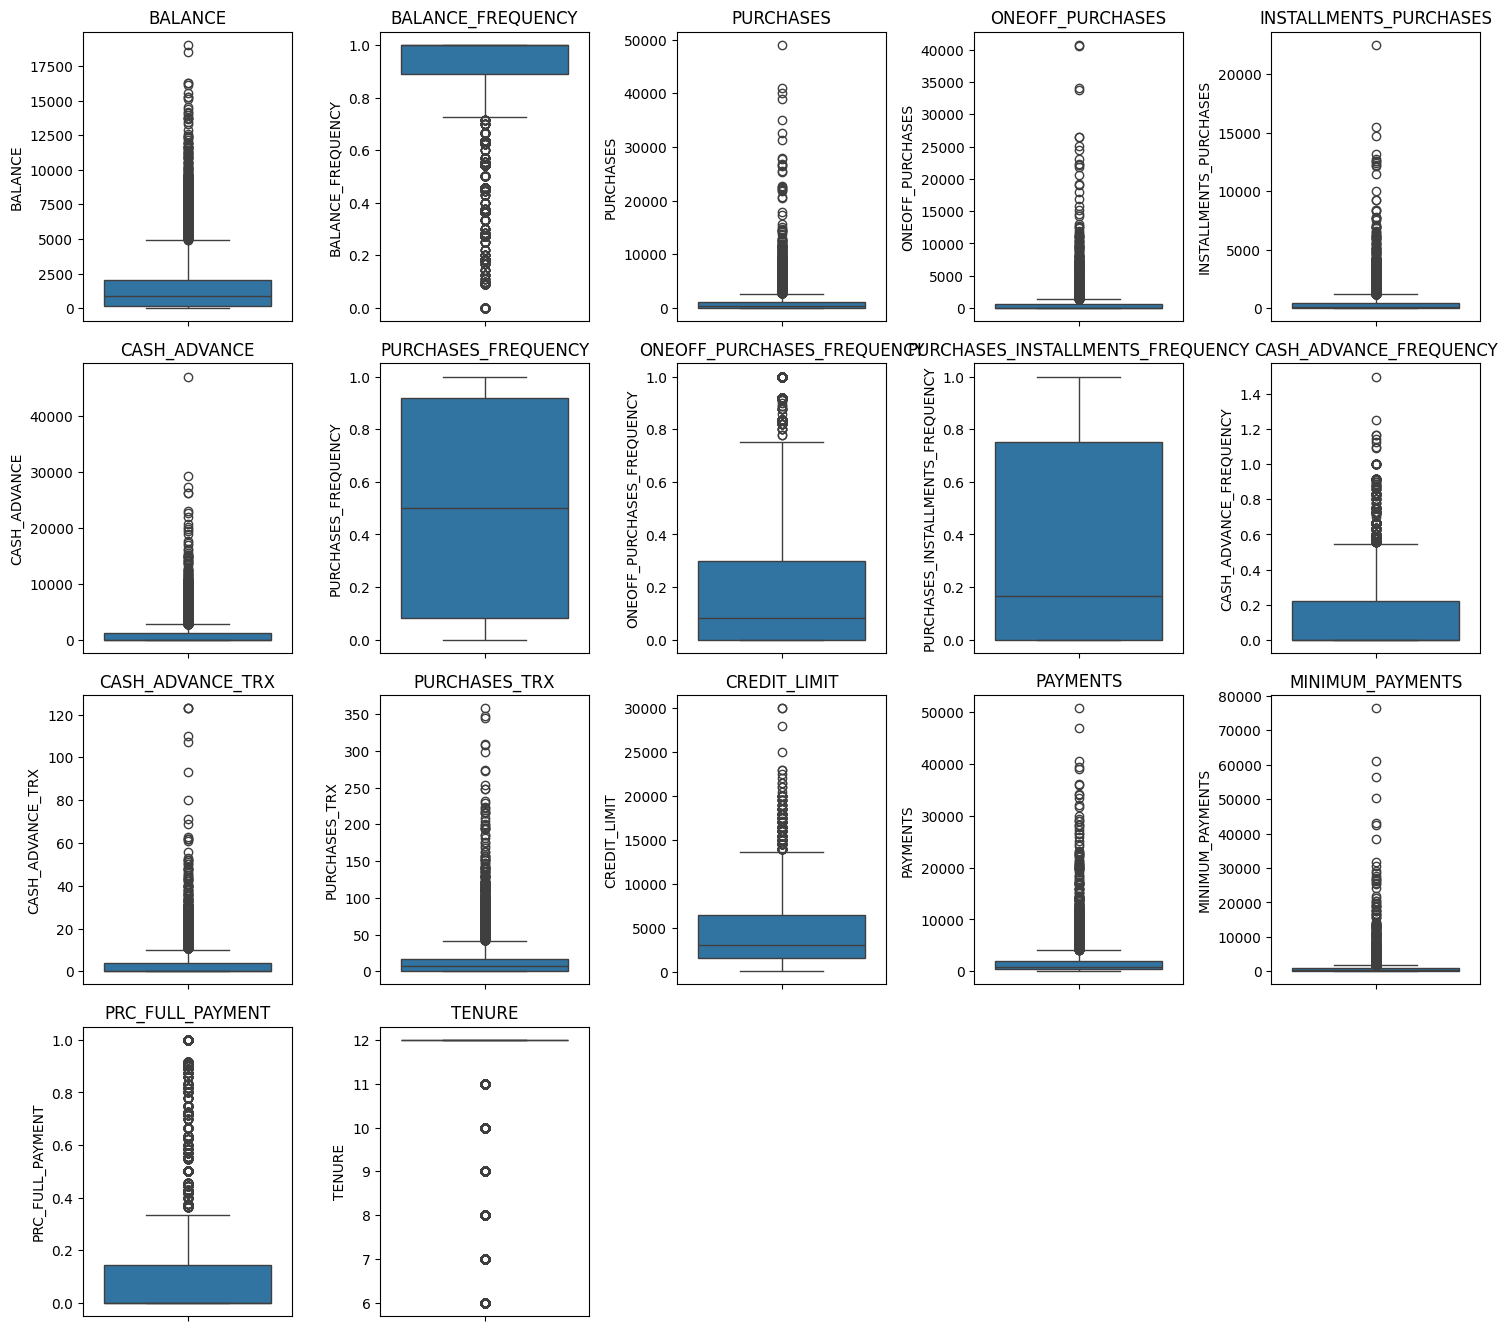

In [59]:
num_cols = data.select_dtypes(include='number').columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 5, i)  # 5열 배치
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### 이상치 비율 확인

In [60]:
def outlier_ratio(df):
    ratios = {}
    num_cols = df.select_dtypes(include="number").columns

    for col in num_cols:
        Q1 = df[col].quantile(0.25) # 25%
        Q3 = df[col].quantile(0.75) # 75%
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR # 하한
        upper = Q3 + 1.5 * IQR # 상한

        outliers = ((df[col] < lower) | (df[col] > upper)).sum() # 하한 또는 상한 이상치 개수
        ratio = outliers / len(df) * 100 # 비율 계산
        ratios[col] = round(ratio, 2)

    return pd.DataFrame.from_dict(ratios, orient='index', columns=['Outlier_Ratio(%)']).sort_values(by='Outlier_Ratio(%)', ascending=False)

outlier_table = outlier_ratio(data)
print(outlier_table)

                                  Outlier_Ratio(%)
BALANCE_FREQUENCY                            16.68
PRC_FULL_PAYMENT                             16.47
TENURE                                       15.26
CASH_ADVANCE                                 11.51
ONEOFF_PURCHASES                             11.32
INSTALLMENTS_PURCHASES                        9.69
MINIMUM_PAYMENTS                              9.40
PAYMENTS                                      9.03
PURCHASES                                     9.03
CASH_ADVANCE_TRX                              8.98
ONEOFF_PURCHASES_FREQUENCY                    8.74
PURCHASES_TRX                                 8.56
BALANCE                                       7.77
CASH_ADVANCE_FREQUENCY                        5.87
CREDIT_LIMIT                                  2.77
PURCHASES_INSTALLMENTS_FREQUENCY              0.00
PURCHASES_FREQUENCY                           0.00


***🤔 왜 이렇게 이상치가 많아 보일까?***

1️⃣ 데이터 분포가 치우쳐 있음 (Skewed Distribution)

> `BALANCE`, `CASH_ADVANCE`, `PURCHASES` 같은 금액 변수는 대부분 고객이 낮은 금액대에 몰려 있고, 일부 극단적으로 높은 고객이 있어서 박스플롯에서는 점이 잔뜩 생김

2️⃣ 샘플이 많은 경우
> 데이터가 수천~만 단위 이상이면 극단치로 분류되는 값이 많아 보이는 건 자연스러움

3️⃣ 신용카드 고객 데이터의 특성
> 소비 패턴이 사람마다 워낙 다르기 때문에, 평균적인 값에서 벗어난 고객이 많음
>
> → 통계적으로는 이상치지만 실제론 중요한 고객일 수 있음.

<br>

💡 `CREDIT_LIMIT(신용한도)`, `PAYMENTS(결제액)`, `PURCHASES(구매액)` 같은 변수는 원래 값의 편차가 큰 게 정상 !

> 박스플롯은 단순히 **통계적 기준(IQR)**으로 극단치를 표시할 뿐,
> 실제 비즈니스적으로는 “프리미엄 고객”, “헤비 유저”처럼 중요한 집단일 수도 있음

*➡️ 이상치가 많기도 하고, 데이터 특성상 이상치 처리(제거)가 위험할 수 있을 것 같음*

# 📊 Pilot Project Week2
> **주제: 신용카드 소비 패턴으로 고객 군집화**

* 데이터 소스 : Kaggle – “Credit Card Dataset for Clustering”
> **금융 데이터를 기반으로 소비자를 군집화한 뒤, 소비자 행동/리스크를 설명**

>**도출해낼 수 있는 인사이트**

* 고객군 정의

* 맞춤형 상품/마케팅 전략 수립

* 신용 리스크 관리 ✅

* 고객 유지/이탈 방지

* 사회적 소비 트렌드 변화 파악

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [62]:
raw_data = pd.read_csv('/content/drive/MyDrive/EPOCH/EPOCH 4th/Build-Up/CC GENERAL.csv')
data = raw_data.copy()
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


## 1️⃣ 컬럼 제거

object 컬럼인 CUST_ID는 삭제

In [63]:
data = data.drop(columns=['CUST_ID'])

## 2️⃣ 결측치 처리

### 결측치 확인

In [64]:
data.isnull().mean()

,0
BALANCE,0.000000
BALANCE_FREQUENCY,0.000000
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000
CASH_ADVANCE_FREQUENCY,0.000000


✅ 결측치 있는 컬럼
* `CREDIT_LIMIT`
* `MINIMUM_PAYMENTS`

### 회귀 대체(regression imputation)
결측치가 존재하는 컬럼이 두 개 이상이므로 여러 개 컬럼을 순차적으로 대체하는 `IterativeImputer(sklearn)` 사용

In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
data_imputed = imputer.fit_transform(data) # numpy.ndarray 형태의 2차원 배열

data = pd.DataFrame(                       # df 형태로 변환
    data_imputed,
    columns=data.columns,
    index=data.index
)

In [66]:
data.isnull().mean()

,0
BALANCE,0.0
BALANCE_FREQUENCY,0.0
PURCHASES,0.0
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,0.0
CASH_ADVANCE,0.0
PURCHASES_FREQUENCY,0.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0
CASH_ADVANCE_FREQUENCY,0.0


*결측치 처리 완료!*

## 3️⃣ 피처 엔지니어링 (Feature Engineering)

### `real_pay_ratio` : 구매액 대비 실제 납부액 비율
> PAYMENTS / PURCHASES

**📊 해석 포인트**
> 비율 ≈ 1 (납부액 ≈ 구매액)

* 고객이 구매한 만큼 제때 결제한다는 의미.
* 신용카드 사용 패턴이 정상적이고 건전한 경우.
* 리스크가 낮은 고객으로 분류 가능.

> 비율 < 1 (납부액 < 구매액)

* 이번 기간 구매액에 비해 실제 납부액이 적다 = 연체 가능성, 최소 결제만 이행.
* 신용 위험이 높거나, 카드사 입장에서는 이자 수익이 발생하는 집단일 수도 있음.
* 소비는 활발하지만 갚는 능력이 떨어지는 고객 → 리스크 관리 필요.

> 비율 > 1 (납부액 > 구매액)

* 이번 기간 구매액보다 더 많이 상환했다는 의미.
* 해석 1: 과거의 미결제 잔액을 이번에 갚음 (할부, 이전달 사용액 상환).
* 해석 2: 현금서비스(Cash Advance) 상환액이 포함된 경우.
* 즉, 단순히 이번 달 사용액과 연결하기보다 “누적 부채 상환”의 의미가 큼.

> 구매액 = 0, 납부액 > 0

* 이번 달엔 새로 구매하지 않았지만 과거 부채 상환 중.
* 0으로 처리

> 구매액 > 0, 납부액 = 0
* 신규 사용 but 미납 (연체 위험)
* 이번 기간에 구매는 했는데 납부는 전혀 하지 않은 경우.
* 카드사 입장에서는 연체 가능성이 큰 신호.

In [67]:
data['real_pay'] = np.where(
    (data['PURCHASES'] == 0) & (data['PAYMENTS'] == 0),  # 둘 다 0이면
    1,
    np.where(
        data['PURCHASES'] == 0,                          # 구매만 0이면
        0,
        data['PAYMENTS'] / data['PURCHASES']             # 그 외는 비율 계산
    )
)

### `risk`: 리스크 지수 (Risk Index)
> (현금서비스 비율 + 최소결제 비율 + 신용한도 사용률) 조합

**📊 해석 포인트**

⬆️ 높을수록:

현금서비스에 의존하고, 최소 결제만 하며, 신용한도까지 많이 사용한다

→ 재정적 압박이 크고 연체 가능성이 높은 집단.

⬇️ 낮을수록:

현금서비스 거의 안 쓰고, 결제는 전액 상환하며, 신용한도도 있게 관리 →
건전한 신용 행태.

In [68]:
data['risk'] = data['CASH_ADVANCE_FREQUENCY'] + data['MINIMUM_PAYMENTS'] + data['CREDIT_LIMIT']

In [69]:
data['risk'].head(10)

,risk
0,1139.509787
1,8072.590217
2,8127.284787
3,7931.303960
4,1444.791237
5,4207.246035
6,13698.065894
7,2832.033990
8,7311.963409
9,11100.302262


### `overpay` : 초과 납부 여부 (양수 = 카드대금보다 많이 낸 고객, 음수 = 미납 가능성)
> PAYMENTS - PURCHASES

In [70]:
data['overpay'] = data['PAYMENTS'] - data['PURCHASES']

In [71]:
data['overpay'].head(10)

,overpay
0,106.402084
1,4103.032597
2,-151.103258
3,-1499.000000
4,662.334763
5,66.777770
6,-736.695672
7,242.865082
8,-173.211432
9,-116.829409


In [72]:
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,real_pay,risk,overpay
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2.115326,1139.509787,106.402084
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,8072.590217,4103.032597
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.804567,8127.284787,-151.103258
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,431.220627,0.000000,12.0,0.000000,7931.303960,-1499.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,42.395923,1444.791237,662.334763
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,1.050085,4207.246035,66.777770
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,64.0,13500.0,6354.314328,198.065894,1.000000,12.0,0.896108,13698.065894,-736.695672
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0,1.556775,2832.033990,242.865082
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0,0.798940,7311.963409,-173.211432
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,0.908841,11100.302262,-116.829409


## 4️⃣ 스케일링

거리 기반 알고리즘인 군집화를 사용하기 때문에 컬럼 간 스케일 차이가 클 경우 학습이 제대로 되지 않을 수 있음

이상치가 중요한 금융 데이터 특성상, 이상치에 민감한 MinMaxScaler나 StandardScaler는 위험할 수 있음
➡️ **RobustScaler** 사용

✅ **RobustScaler**

특징
* 이상치에 둔감
→ 따라서 RobustScaler는 이상치가 많은 데이터에 적합.

* 스케일링 후 분포
> 대부분의 값이 -1 ~ 1 근처에 위치하지만, 정확히 [-1, 1]로 한정되지는 않음. (MinMaxScaler처럼 범위 고정이 아님)

* 변환 결과
> 중앙값: 0으로 이동
>
> 사분위수 범위: 1 단위로 맞춤 (즉, 데이터의 “중간 50% 구간”이 -0.5 ~ +0.5 사이쯤 분포)

In [73]:
# TENURE만 제외
scale_cols = data.columns.drop('TENURE')

# RobustScaler 적용
scaler = RobustScaler()
data[scale_cols] = scaler.fit_transform(data[scale_cols])

In [74]:
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,real_pay,risk,overpay
0,-0.432267,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.254399,0.000000,12.0,0.681384,-0.556302,-0.128699
1,1.209374,-0.818182,-0.337489,-0.065812,-0.189912,5.784542,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138626,1.208553,1.555556,12.0,-0.569668,0.799752,4.154003
2,0.842099,0.000000,0.384766,1.273231,-0.189912,0.000000,0.600000,3.055557,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154715,0.510575,0.000000,12.0,-0.093829,0.810450,-0.404636
3,0.411913,-3.272727,1.062798,2.530286,-0.189912,0.184759,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564547,0.203089,0.000000,12.0,-0.569668,0.772117,-1.849012
4,-0.028907,0.000000,-0.322542,-0.038102,-0.189912,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.089287,0.000000,12.0,24.504244,-0.496591,0.467027
5,0.486247,0.000000,0.907991,-0.065812,2.655101,0.000000,0.200000,-0.277777,0.555555,0.000000,0.00,0.0625,-0.244898,0.357844,3.302079,0.000000,12.0,0.051377,0.043722,-0.171159
6,-0.127800,0.000000,6.286559,11.022818,1.278984,0.000000,0.600000,3.055557,1.111111,0.000000,0.00,3.5625,2.142857,3.621822,-0.162566,7.000007,12.0,-0.039689,1.900048,-1.032144
7,0.493426,0.000000,0.069986,-0.065812,0.740871,0.000000,0.600000,-0.277777,1.111111,0.000000,0.00,0.3125,-0.142857,-0.117163,0.361194,0.000000,12.0,0.351044,-0.225258,0.017532
8,0.073495,0.000000,0.467270,1.079814,0.236857,0.000000,-0.200000,0.000000,0.111111,0.000000,0.00,-0.1250,0.816327,-0.111093,0.016059,0.000000,12.0,-0.097157,0.650979,-0.428326
9,-0.374461,-4.090909,0.859714,2.153774,-0.189912,0.000000,-0.399999,0.277780,-0.222223,0.000000,0.00,-0.2500,1.632653,0.202831,-0.315888,0.000000,12.0,-0.032159,1.391947,-0.367909


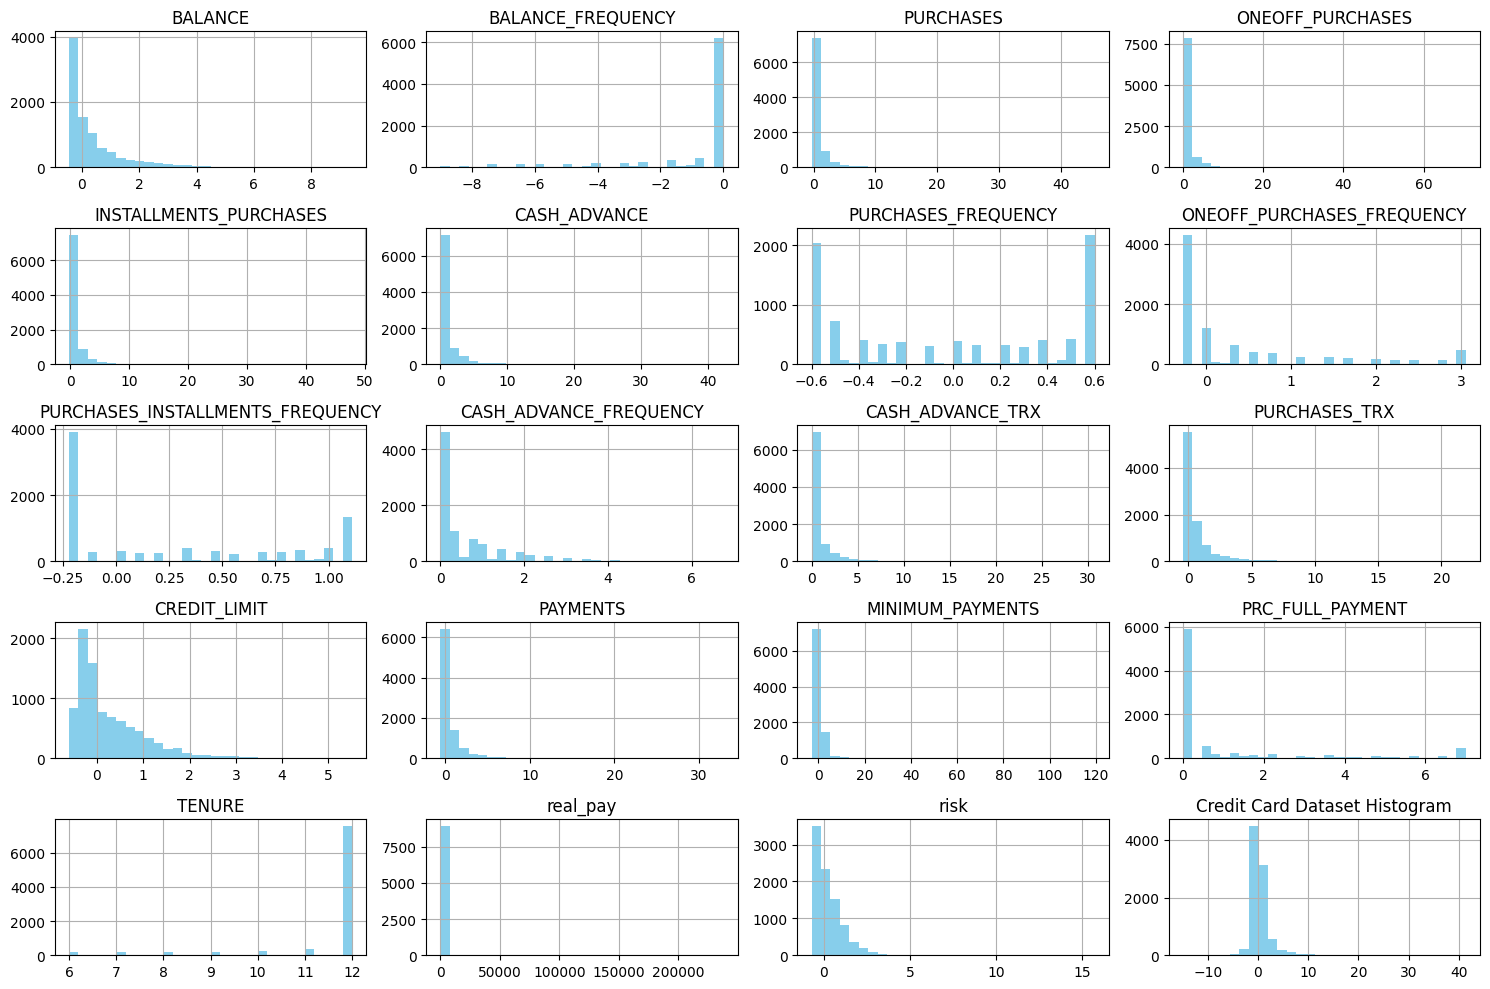

In [75]:
data.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.title('Credit Card Dataset Histogram')
plt.tight_layout()
plt.show()

*이상치가 중요한 역할을 할 수도 있어 로그 변환은 일단 보류,,*

In [76]:
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,real_pay,risk,overpay
0,-0.432267,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.254399,0.000000,12.0,0.681384,-0.556302,-0.128699
1,1.209374,-0.818182,-0.337489,-0.065812,-0.189912,5.784542,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138626,1.208553,1.555556,12.0,-0.569668,0.799752,4.154003
2,0.842099,0.000000,0.384766,1.273231,-0.189912,0.000000,0.600000,3.055557,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154715,0.510575,0.000000,12.0,-0.093829,0.810450,-0.404636
3,0.411913,-3.272727,1.062798,2.530286,-0.189912,0.184759,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564547,0.203089,0.000000,12.0,-0.569668,0.772117,-1.849012
4,-0.028907,0.000000,-0.322542,-0.038102,-0.189912,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.089287,0.000000,12.0,24.504244,-0.496591,0.467027
5,0.486247,0.000000,0.907991,-0.065812,2.655101,0.000000,0.200000,-0.277777,0.555555,0.000000,0.00,0.0625,-0.244898,0.357844,3.302079,0.000000,12.0,0.051377,0.043722,-0.171159
6,-0.127800,0.000000,6.286559,11.022818,1.278984,0.000000,0.600000,3.055557,1.111111,0.000000,0.00,3.5625,2.142857,3.621822,-0.162566,7.000007,12.0,-0.039689,1.900048,-1.032144
7,0.493426,0.000000,0.069986,-0.065812,0.740871,0.000000,0.600000,-0.277777,1.111111,0.000000,0.00,0.3125,-0.142857,-0.117163,0.361194,0.000000,12.0,0.351044,-0.225258,0.017532
8,0.073495,0.000000,0.467270,1.079814,0.236857,0.000000,-0.200000,0.000000,0.111111,0.000000,0.00,-0.1250,0.816327,-0.111093,0.016059,0.000000,12.0,-0.097157,0.650979,-0.428326
9,-0.374461,-4.090909,0.859714,2.153774,-0.189912,0.000000,-0.399999,0.277780,-0.222223,0.000000,0.00,-0.2500,1.632653,0.202831,-0.315888,0.000000,12.0,-0.032159,1.391947,-0.367909


In [77]:
# data.to_csv('/content/drive/MyDrive/EPOCH/EPOCH 4th/Build-Up/data.csv')

# 📊 Pilot Project Week2
> **주제: 신용카드 소비 패턴으로 고객 군집화**

* 데이터 소스 : Kaggle – “Credit Card Dataset for Clustering”
> **금융 데이터를 기반으로 소비자를 군집화한 뒤, 소비자 행동/리스크를 설명**

>**도출해낼 수 있는 인사이트**

* 고객군 정의

* 맞춤형 상품/마케팅 전략 수립

* 신용 리스크 관리 ✅

* 고객 유지/이탈 방지

* 사회적 소비 트렌드 변화 파악

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy.stats import chi2

In [79]:
raw_data = pd.read_csv('/content/drive/MyDrive/EPOCH/EPOCH 4th/Build-Up/CC GENERAL.csv')
data = pd.read_csv('/content/drive/MyDrive/EPOCH/EPOCH 4th/Build-Up/data.csv')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   float64
 12  PURCHA

## 최적의 k 값 찾기(실루엣 계수)

In [81]:
# 탐색할 k 범위 지정
k_range = range(2, 11)  # k=2 ~ 10까지
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)  # 클러스터 라벨 예측
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")

# 최적 k 찾기
best_k = k_range[np.argmax(silhouette_scores)]
print(f"최적의 k 값: {best_k}, 실루엣 계수: {max(silhouette_scores):.4f}")

k=2, Silhouette Score=0.6213
k=3, Silhouette Score=0.6251
k=4, Silhouette Score=0.5880
k=5, Silhouette Score=0.5689
k=6, Silhouette Score=0.5566
k=7, Silhouette Score=0.5592
k=8, Silhouette Score=0.5515
k=9, Silhouette Score=0.5458
k=10, Silhouette Score=0.5416
최적의 k 값: 3, 실루엣 계수: 0.6251


* 시각화

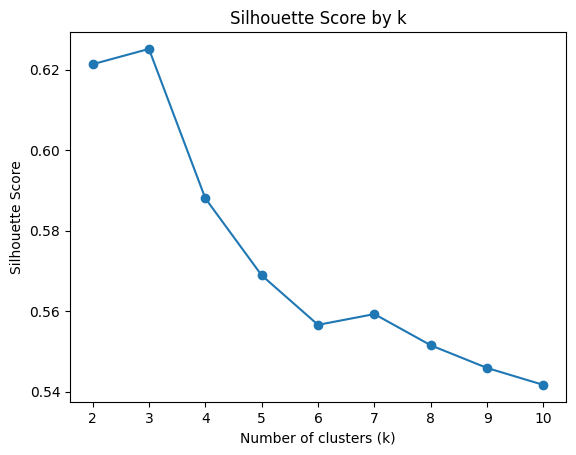

In [82]:
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score by k")
plt.show()

**k=3이 best!**

*비지도 학습은 정답이 없는 데이터를 다루기 때문에 데이터셋 분할이 필수적이지 않음*

## ✅ K-means

In [83]:
k = 3  # 원하는 군집 수
kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
labels = kmeans.fit_predict(data)

# 클러스터 라벨 붙이기
kmeans_clustered = data.copy()
kmeans_clustered["cluster"] = labels

# 4) 클러스터별 특징(평균값)
cluster_profile = kmeans_clustered.groupby("cluster").mean(numeric_only=True)
print("=== 클러스터별 평균 특징 ===")
print(cluster_profile)

# 필요하면 중앙값/표준편차도 같이 확인 가능
kmeans_cluster_median = kmeans_clustered.groupby("cluster").median(numeric_only=True)
k_means_cluster_std = kmeans_clustered.groupby("cluster").std(numeric_only=True)

print("\n=== 클러스터별 중앙값 ===")
print(kmeans_cluster_median)
print("\n=== 클러스터별 표준편차 ===")
print(k_means_cluster_std)

=== 클러스터별 평균 특징 ===
         Unnamed: 0   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                         
0        2238.53652  0.570909          -0.897432   0.829530          1.284471   
1        6713.50000  0.146573          -1.311810   0.369727          0.635842   
2        2075.00000  0.255026          -1.636364  -0.337479         -0.065794   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                      0.812316      1.015373             0.000081   
1                      0.562226      0.741234            -0.023146   
2                     -0.189912      4.998645            -0.490909   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
cluster                                                                ...   
0                          0.540442                          0.2546

In [84]:
print(kmeans_clustered["cluster"].value_counts())

cluster
0    4477
1    4472
2       1
Name: count, dtype: int64


*cluster 2에 샘플이 한 개뿐..이네?*

## ✅ DBSCAN

In [85]:
# DBSCAN 모델링
dbscan = DBSCAN(eps=0.8, min_samples=10, metric="euclidean", n_jobs=-1)
labels = dbscan.fit_predict(data)  # -1: 노이즈

# 결과 요약
dbscan_clustered = data.copy()
dbscan_clustered["cluster"] = labels
sizes = dbscan_clustered["cluster"].value_counts().sort_index()
print("클러스터 크기(노이즈=-1):\n", sizes)

# 4) 노이즈 제외 프로파일(평균)
profile = (
    dbscan_clustered[dbscan_clustered["cluster"] != -1]
      .groupby("cluster")
      .mean(numeric_only=True)
      .sort_index()
)
print("\n클러스터별 평균(노이즈 제외):\n", profile)

클러스터 크기(노이즈=-1):
 cluster
-1    8950
Name: count, dtype: int64

클러스터별 평균(노이즈 제외):
 Empty DataFrame
Columns: [Unnamed: 0, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, real_pay, risk, overpay]
Index: []

[0 rows x 21 columns]


*모든 샘플이 노이즈(-1)로 분류가 되었다 ,,*

## PCA

In [86]:
# 1) 누적 설명분산이 90%가 될 때까지 자동으로 컴포넌트 선택
pca_auto = PCA(n_components=0.90, svd_solver="full", random_state=42)
X_pca_auto = pca_auto.fit_transform(data)

print(f"[AUTO] 선택된 주성분 개수: {pca_auto.n_components_}")
print(f"[AUTO] 누적 설명분산비: {pca_auto.explained_variance_ratio_.sum():.3f}")

# 2) 시각화/클러스터링 편의를 위한 2차원 투영 (옵션)
pca_2d = PCA(n_components=2, svd_solver="full", random_state=42)
X_pca_2d = pca_2d.fit_transform(data)

print(f"[2D] 설명분산비: {pca_2d.explained_variance_ratio_.round(3)}")

[AUTO] 선택된 주성분 개수: 2
[AUTO] 누적 설명분산비: 1.000
[2D] 설명분산비: [0.507 0.493]


*컬럼이 21개인데 2개의 주성분으로 모든 변수가 설명 가능*

특성들 간의 선형결합이 심했던 것 ➡️ **극단적인 다중공선성**

## ✅ PCA 기반 K-means

In [87]:
# PCA로 변환된 데이터 사용
X_pca = X_pca_auto

# 1) 최적 k 찾기 (실루엣 계수)
k_range = range(2, 11)
sil_scores = {}
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    sil_scores[k] = sil
    print(f"k={k}, silhouette={sil:.3f}")

best_k = max(sil_scores, key=sil_scores.get)
print("최적 k:", best_k)

# 2) 최적 k로 최종 KMeans 학습
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca)

# 3) 라벨을 원본 데이터프레임에 붙이기
df_kmeans = data.copy()
df_kmeans["cluster"] = labels_kmeans
print(df_kmeans["cluster"].value_counts())

k=2, silhouette=0.987
k=3, silhouette=0.625
k=4, silhouette=0.588
k=5, silhouette=0.589
k=6, silhouette=0.571
k=7, silhouette=0.559
k=8, silhouette=0.551
k=9, silhouette=0.546
k=10, silhouette=0.541
최적 k: 2
cluster
0    8949
1       1
Name: count, dtype: int64


In [88]:
df_kmeans[df_kmeans["cluster"] == 1]

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,real_pay,risk,overpay,cluster
2075,2075,0.255026,-1.636364,-0.337479,-0.065794,-0.189912,4.998645,-0.490909,0.025253,-0.222223,...,-0.375,0.0,2.08553,0.342722,0.875001,11.0,237895.691701,-0.090594,4.067631,1


*2075번째 샘플(극단적 이상치로 판단)을 삭제하고 다시 해보자*

In [89]:
data_2075 = data.drop(index=2075)

PCA(data_2075)

In [90]:
# 1) 누적 설명분산이 90%가 될 때까지 자동으로 컴포넌트 선택
pca_auto = PCA(n_components=0.90, svd_solver="full", random_state=42)
X_pca_auto = pca_auto.fit_transform(data_2075)

print(f"[AUTO] 선택된 주성분 개수: {pca_auto.n_components_}")
print(f"[AUTO] 누적 설명분산비: {pca_auto.explained_variance_ratio_.sum():.3f}")

# 2) 시각화/클러스터링 편의를 위한 2차원 투영 (옵션)
pca_2d = PCA(n_components=2, svd_solver="full", random_state=42)
X_pca_2d = pca_2d.fit_transform(data_2075)

print(f"[2D] 설명분산비: {pca_2d.explained_variance_ratio_.round(3)}")

[AUTO] 선택된 주성분 개수: 1
[AUTO] 누적 설명분산비: 0.934
[2D] 설명분산비: [0.934 0.066]


K-means(data_2075)

In [91]:
# PCA로 변환된 데이터 사용
X_pca = X_pca_auto

# 1) 최적 k 찾기 (실루엣 계수)
k_range = range(2, 11)
sil_scores = {}
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    sil_scores[k] = sil
    print(f"k={k}, silhouette={sil:.3f}")

best_k = max(sil_scores, key=sil_scores.get)
print("최적 k:", best_k)

# 2) 최적 k로 최종 KMeans 학습
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca)

# 3) 라벨을 원본 데이터프레임에 붙이기
df_kmeans = data_2075.copy()
df_kmeans["cluster"] = labels_kmeans
print(df_kmeans["cluster"].value_counts())

k=2, silhouette=0.627
k=3, silhouette=0.590
k=4, silhouette=0.572
k=5, silhouette=0.561
k=6, silhouette=0.554
k=7, silhouette=0.548
k=8, silhouette=0.544
k=9, silhouette=0.541
k=10, silhouette=0.538
최적 k: 2
cluster
0    4484
1    4465
Name: count, dtype: int64


실루엣 계수는 조금 더 낮지만, 고객 분류에 두 개의 그룹은 너무 작으니, 해석상 편의를 위해 k=4로 지정

In [92]:
# 2) 최적 k로 최종 KMeans 학습
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca)

# 3) 라벨을 원본 데이터프레임에 붙이기
df_kmeans = data_2075.copy()
df_kmeans["cluster"] = labels_kmeans
print(df_kmeans["cluster"].value_counts())

cluster
0    2263
2    2239
1    2225
3    2222
Name: count, dtype: int64


## ✅ PCA 기반 DBSCAN

In [93]:
# PCA 데이터 사용
X_pca = X_pca_auto

# 1) DBSCAN 학습
dbscan = DBSCAN(eps=5, min_samples=10, n_jobs=-1)
labels_dbscan = dbscan.fit_predict(X_pca)

# 2) 라벨 요약
df_dbscan = data_2075.copy()
df_dbscan["cluster"] = labels_dbscan
print("클러스터 분포 (노이즈=-1):")
print(df_dbscan["cluster"].value_counts().sort_index())


클러스터 분포 (노이즈=-1):
cluster
-1       1
 0     329
 1    1747
 2    1482
 3     893
 4    2072
 5    2425
Name: count, dtype: int64


In [94]:
mask = labels_dbscan != -1
if len(set(labels_dbscan[mask])) > 1:   # 클러스터가 2개 이상 있어야 계산 가능
    sil = silhouette_score(X_pca[mask], labels_dbscan[mask])
    print(f"실루엣 계수 (노이즈 제외): {sil:.3f}")
else:
    print("⚠️ 유효 클러스터가 2개 이상 있어야 실루엣 계수를 계산할 수 있습니다.")

실루엣 계수 (노이즈 제외): 0.466


*eps=5로 설정해야 다수의 샘플이 노이즈로 분류되지 않고, 적절한 클러스터 개수로 클러스터링이 되는데 K-means 보다 실루엣 계수가 낮음*

## 시각화

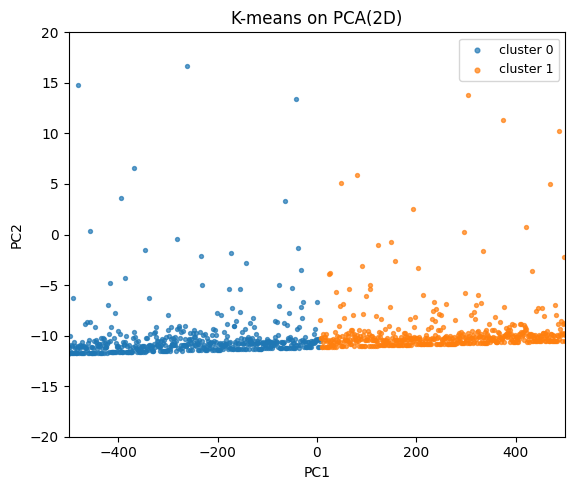

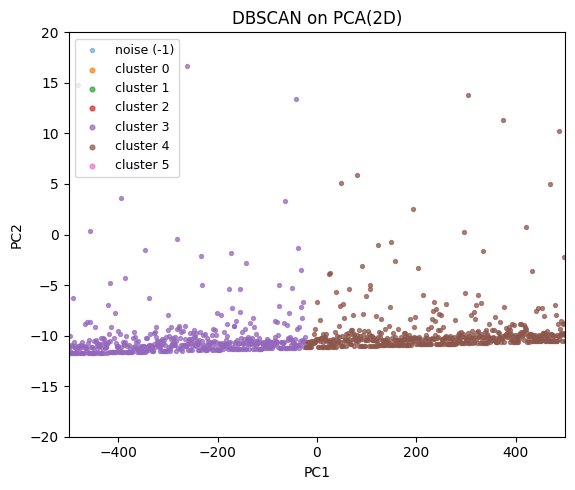

In [95]:
# ===== 준비: 2D 임베딩 =====
# 이미 만들어 둔 2차원 PCA 결과가 있다면 사용
X_pca2d = X_pca_2d  # (n_samples, 2)


# ===== 공통 유틸 =====
def plot_clusters_2d(X2d, labels, title, centroids=None):
    """
    X2d: (n,2) 2D 좌표
    labels: 클러스터 라벨 (DBSCAN의 노이즈는 -1)
    centroids: (k,2) 센트로이드 좌표 (옵션: K-means용)
    """
    X2d = np.asarray(X2d)
    labels = np.asarray(labels)

    plt.figure(figsize=(6,5))
    # 노이즈(-1) 먼저 회색으로
    noise_mask = (labels == -1)
    if noise_mask.any():
        plt.scatter(X2d[noise_mask,0], X2d[noise_mask,1],
                    s=6, alpha=0.4, label="noise (-1)")

    # 나머지 클러스터
    for c in sorted(np.unique(labels[labels!=-1])):
        m = (labels == c)
        plt.scatter(X2d[m,0], X2d[m,1], s=8, alpha=0.7, label=f"cluster {c}")

    # K-means 센트로이드가 있으면 표시(별표)
    if centroids is not None:
        centroids = np.asarray(centroids)
        plt.scatter(centroids[:,0], centroids[:,1],
                    marker="*", s=200, edgecolor="k", linewidths=0.8,
                    label="centroids")

    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(loc="best", fontsize=9, markerscale=1.2, frameon=True)
    plt.tight_layout()
    plt.xlim(-500, 500)   # PC1 범위를 제한
    plt.ylim(-20, 20)     # PC2 범위를 제한
    plt.show()

# ===== 1) K-means 시각화 =====
# kmeans는 PCA 2D 데이터로 학습했다고 가정 (권장)
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca2d)
centers_2d = kmeans.cluster_centers_
plot_clusters_2d(X_pca2d, labels_kmeans, title="K-means on PCA(2D)")

# ===== 2) DBSCAN 시각화 =====
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=5, min_samples=10, n_jobs=-1)
# labels_dbscan = dbscan.fit_predict(X_pca2d)

plot_clusters_2d(X_pca2d, labels_dbscan, title="DBSCAN on PCA(2D)")


*시각화가 이상하네,,*

**이상치 감지한 뒤 K-means 학습에서 제외**

In [96]:
def robust_z(x):
    x = np.asarray(x, float)
    med = np.median(x); mad = np.median(np.abs(x - med))
    if mad == 0: return np.zeros_like(x)
    return 0.6745 * (x - med) / mad

def detect_outliers_in_pca(X_pca, z_thresh=6.0, use_mahal=True, mahal_q=0.999):
    Z = np.column_stack([robust_z(X_pca[:, j]) for j in range(X_pca.shape[1])])
    rule1 = (np.abs(Z) > z_thresh).any(axis=1)
    if not use_mahal:
        return rule1
    mu = X_pca.mean(axis=0)
    S = np.cov(X_pca, rowvar=False)
    Sinv = np.linalg.pinv(S)
    diff = X_pca - mu
    m2 = np.einsum("ij,jk,ik->i", diff, Sinv, diff)
    cut = chi2.ppf(mahal_q, df=X_pca.shape[1])
    rule2 = m2 > cut
    return rule1 | rule2

def kmeans_outlier_pipeline_with_plot(
    df_numeric: pd.DataFrame,
    k=4,
    pca_components=2,   # 모델 학습용 PCA 누적분산
    z_thresh=6.0,
    use_mahal=True,
    mahal_q=0.999,
    random_state=42,
    n_init=20,
    point_size=8,
    alpha=0.7,
):
    # ===== 0) 전처리 =====
    X = df_numeric.to_numpy(dtype=float)
    X[~np.isfinite(X)] = np.nan
    imputer = SimpleImputer(strategy="median")
    X_imp = imputer.fit_transform(X)
    scaler = RobustScaler()
    Xs = scaler.fit_transform(X_imp)

    # ===== 1) 모델 학습용 PCA =====
    pca_model = PCA(n_components=pca_components, svd_solver="full", random_state=random_state)
    X_pca = pca_model.fit_transform(Xs)

    # ===== 2) 이상치 감지 & 분리 =====
    outlier_mask = detect_outliers_in_pca(X_pca, z_thresh=z_thresh, use_mahal=use_mahal, mahal_q=mahal_q)
    keep_mask = ~outlier_mask

    # ===== 3) K-means (이상치 제외) =====
    km = KMeans(n_clusters=k, random_state=random_state, n_init=n_init)
    labels_keep = km.fit_predict(X_pca[keep_mask])

    labels_all = np.full(X.shape[0], -1, dtype=int)
    labels_all[keep_mask] = labels_keep

    # ===== 4) 요약 지표 =====
    sil = None
    uniq = np.unique(labels_keep)
    if len(uniq) >= 2:
        sil = silhouette_score(X_pca[keep_mask], labels_keep)

    # ===== 5) 시각화용 2D PCA =====
    pca_2d = PCA(n_components=2, random_state=random_state)
    X_pca2d = pca_2d.fit_transform(Xs)  # 전 데이터 2D 투영

    # 시각화용 클러스터 중심: 2D 좌표에서의 군집 평균(이상치 제외)
    centers_2d = []
    for c in sorted(np.unique(labels_keep)):
        m = (labels_all == c)
        centers_2d.append(X_pca2d[m].mean(axis=0))
    centers_2d = np.vstack(centers_2d) if len(centers_2d) else None

    # ===== 6) 그리기 =====
    plt.figure(figsize=(7,6))
    # 6-1) 이상치 회색
    if outlier_mask.any():
        plt.scatter(X_pca2d[outlier_mask,0], X_pca2d[outlier_mask,1],
                    s=point_size, alpha=0.25, label="outlier (-1)")

    # 6-2) 정상 클러스터
    for c in sorted(np.unique(labels_all[labels_all!=-1])):
        m = labels_all == c
        plt.scatter(X_pca2d[m,0], X_pca2d[m,1], s=point_size, alpha=alpha, label=f"cluster {c}")

    # 6-3) 중심 ★
    if centers_2d is not None and centers_2d.size:
        plt.scatter(centers_2d[:,0], centers_2d[:,1],
                    marker="*", s=220, edgecolor="k", linewidths=0.8, label="centroid")

    plt.title("K-means on PCA (2D) with outliers")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.legend(loc="best", fontsize=9, markerscale=1.2, frameon=True)
    plt.xlim(-15, 10)   # PC1 범위를 제한
    plt.ylim(-10, 15)     # PC2 범위를 제한
    plt.tight_layout()
    plt.show()

    # ===== 7) 결과 반환 =====
    out = df_numeric.copy()
    out["cluster"] = labels_all
    out["is_outlier"] = outlier_mask
    summary = {
        "pca_model_components_": int(pca_model.n_components_),
        "pca_model_var_ratio_sum": float(pca_model.explained_variance_ratio_.sum()),
        "n_outliers": int(outlier_mask.sum()),
        "cluster_sizes_incl_outliers": out["cluster"].value_counts().sort_index().to_dict(),
        "silhouette_excluding_outliers": sil,
    }
    objs = {"imputer": imputer, "scaler": scaler, "pca_model": pca_model, "pca_2d": pca_2d, "kmeans": km}
    return out, summary, objs

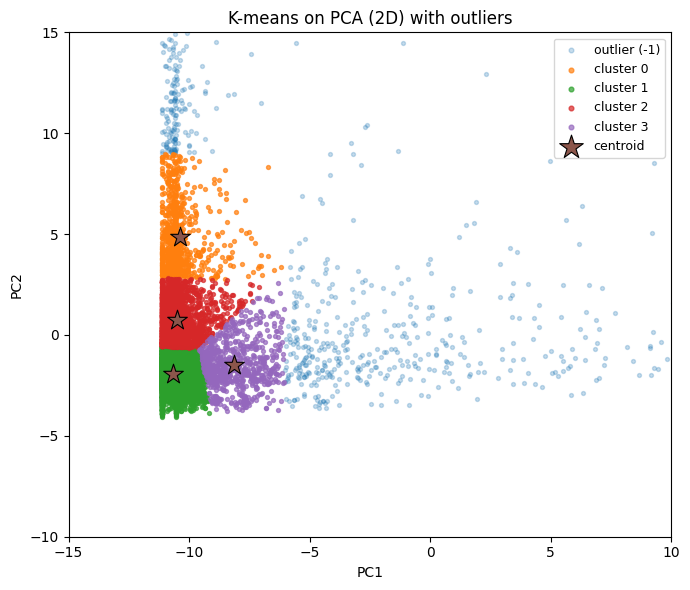

{'pca_model_components_': 2, 'pca_model_var_ratio_sum': 0.9999009374105222, 'n_outliers': 778, 'cluster_sizes_incl_outliers': {-1: 778, 0: 768, 1: 4476, 2: 2197, 3: 730}, 'silhouette_excluding_outliers': np.float64(0.4879060059651079)}
   Unnamed: 0   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0           0 -0.432267          -1.636364  -0.248371         -0.065812   
1           1  1.209374          -0.818182  -0.337489         -0.065812   
2           2  0.842099           0.000000   0.384766          1.273231   
3           3  0.411913          -3.272727   1.062798          2.530286   
4           4 -0.028907           0.000000  -0.322542         -0.038102   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.013657      0.000000            -0.399999   
1               -0.189912      5.784542            -0.600000   
2               -0.189912      0.000000             0.600000   
3               -0.189912      0.184759            -0.500

In [97]:
# 숫자형만 준비
# num_df = data_2075.select_dtypes(include=[np.number]).copy()

clustered_df, info, objs = kmeans_outlier_pipeline_with_plot(
    data_2075, k=4, pca_components=2, z_thresh=6.0, use_mahal=True, mahal_q=0.999
)

print(info)                # PCA/이상치/실루엣/군집 크기 요약
print(clustered_df.head()) # cluster=-1은 이상치

**다음 TASK**
* `data_2075`말고 원본 데이터로도 실행해보기
* 클러스터별 특성 파악 및 인사이트 도출
* 디벨롭할 만한 요소 좀 더 찾아보기

#

# 📊 Pilot Project Week4
> **주제: 신용카드 소비 패턴으로 고객 군집화**

* 데이터 소스 : Kaggle – “Credit Card Dataset for Clustering”
> **금융 데이터를 기반으로 소비자를 군집화한 뒤, 소비자 행동/리스크를 설명**

>**도출해낼 수 있는 인사이트**

* 고객군 정의

* 맞춤형 상품/마케팅 전략 수립

* 신용 리스크 관리 ✅

* 고객 유지/이탈 방지

* 사회적 소비 트렌드 변화 파악

## 클러스터별 비교

In [98]:
def summarize_clusters(out, df_numeric, pca_model):
    summary = {}
    # (1) 기본 통계
    cluster_stats = out.groupby("cluster")[df_numeric.columns].mean()
    summary["means"] = cluster_stats

    # (2) 클러스터별 데이터 개수
    summary["counts"] = out["cluster"].value_counts().to_dict()

    # (3) 주요 변수 편차 (std)
    summary["stds"] = out.groupby("cluster")[df_numeric.columns].std()

    # (4) PCA 로딩
    loadings = pd.DataFrame(pca_model.components_.T,
                            index=df_numeric.columns,
                            columns=[f"PC{i+1}" for i in range(pca_model.n_components_)])
    summary["pca_loadings"] = loadings
    return summary

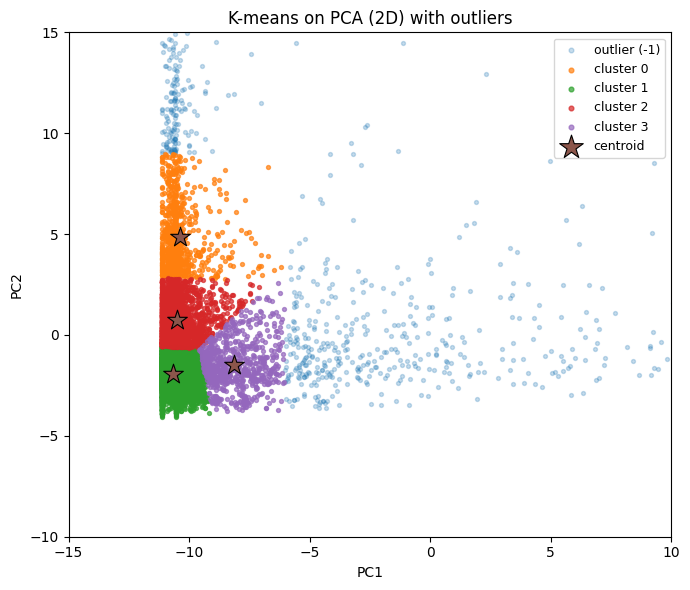

In [99]:
num_df = data_2075.select_dtypes(include=[np.number]).copy()
clustered_df, info, objs = kmeans_outlier_pipeline_with_plot(
    data_2075, k=4, pca_components=2, z_thresh=6.0, use_mahal=True, mahal_q=0.999)

In [100]:
summarize_clusters(clustered_df, num_df, objs["pca_model"])

{'means':           Unnamed: 0   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
 cluster                                                        
 -1       3665.667095  1.222076          -0.844136   2.442293   
  0       3524.229167  1.188597          -0.216310   2.591570   
  1       5039.843387 -0.070408          -1.607720  -0.059267   
  2       3956.467000  0.667377          -0.334598   0.824243   
  3       4432.200000  0.269494          -1.548066  -0.094227   
 
          ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
 cluster                                                           
 -1               3.446503                1.832520      2.003463   
  0               3.401133                2.231241      1.448836   
  1               0.141826                0.190462      0.486909   
  2               1.151183                0.964484      1.144241   
  3               0.187189                0.055119      0.679347   
 
          PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENC

##📊 클러스터별 해석
### *️⃣ Cluster -1 (Outliers, 778명)

**특징**
* `ONEOFF_PURCHASES`, `CASH_ADVANCE`, `PAYMENTS`, `MINIMUM_PAYMENTS`, `real_pay`, `overpay` 모두 평균적으로 압도적으로 높음
* 표준편차도 매우 큼 → 극단적인 고액 사용자 포함

**해석**
* 비정상적 혹은 고액 특수 고객군
* 일부는 “과소비 + 현금서비스 빈번 사용” → 리스크 높음
* 동시에 높은 한도와 결제 능력(높은 payments)도 있어 VIP와 리스크 고객이 섞인 집단

### 0️⃣ Cluster 0 (768명)

**특징**
* `PURCHASES`, `ONEOFF_PURCHASES`, `PURCHASES_TRX` 모두 높은 편
* `CREDIT_LIMIT`, `PAYMENTS` 중상위권
* `real_pay` 낮음, 하지만 `overpay` 다소 높음

**해석**
* 소비 중심적·건전 고객군
* 주로 일시불 구매(ONEOFF), 거래 빈도 높음
* 신용 한도도 상대적으로 넉넉하고, 결제 성실
* 일반적인 우량 소비자 집단

### 1️⃣ Cluster 1 (4476명, 가장 큰 집단)

**특징**
* `PURCHASES`, `ONEOFF_PURCHASES`, `CASH_ADVANCE` 모두 낮음
* `CREDIT_LIMIT`, `PAYMENTS`, `MINIMUM_PAYMENTS`도 낮음
* `TENURE`는 다른 군집과 유사 → 오래 사용하지만 활동 적음

**해석**
* 저활동·저소비 고객군 (Inactive/Light users)
* 카드를 쓰긴 하지만 결제액이 작고, 현금서비스도 거의 없음
* 상대적으로 리스크도 낮음
* 마케팅 관점에서는 활성화 캠페인 대상

### 2️⃣ Cluster 2 (2197명)

**특징**
* `PURCHASES`, `INSTALLMENTS_PURCHASES`, `CASH_ADVANCE` 중간 수준
* `CREDIT_LIMIT`, `PAYMENTS`, `MINIMUM_PAYMENTS`도 평균 정도
* `risk`는 다소 높은 편

**해석**
* 중간 활동·균형형 고객군
* 할부 구매도 적당히 사용, 현금서비스도 약간 활용
* 리스크는 중간 정도 → 중산층·평균적 소비자에 해당
* 마케팅 전략: “일반 고객 유지 + 우량 고객으로 성장 유도”

### 3️⃣ Cluster 3 (730명)

**특징**

* `CASH_ADVANCE` 높음 (현금서비스 사용량 많음)
* `real_pay`와 `overpay`가 높은 편
* `CREDIT_LIMIT` 낮은 편 → 적은 한도 내에서 반복적 사용

**해석**
* 현금서비스 의존형 고객군
* 소비 여력은 크지 않지만, 현금서비스와 소액 결제를 자주 사용
* 과다 사용 시 리스크로 이어질 수 있음 → 잠재적 고위험 고객
* 관리 포인트: 연체 방지, 신용 위험 관리

## 📝 종합 정리

* `Cluster -1` (778명): 극단적 이상치 → VIP 고액 사용자 & 과소비 리스크 고객

* `Cluster 0` (768명): 활발한 소비 중심 → 우량 고객군 (주요 수익원)

* `Cluster 1` (4476명): 저활동·저소비 → 비활성 고객군 (활성화 대상)

* `Cluster 2` (2197명): 평균적·균형형 → 중간층 (성장 잠재력 고객)

* `Cluster 3` (730명): 현금서비스 의존 → 잠재 리스크 고객군 (관리 필요)